# Next Big Thing Pipeline

### Standard Python Library Imports

In [ ]:
import import_ipynb
from datetime import date, timedelta

### Imports from Next Big Thing Jupyter Notebooks

In [ ]:
#Find Category
import Step1_Find_Category_From_Thing as fcat


importing Jupyter notebook from Step1_Find_Category_From_Thing.ipynb


2022-04-25 01:39:23 INFO: Downloading default packages for language: en (English)...
2022-04-25 01:39:27 INFO: File exists: /root/stanza_resources/en/default.zip
2022-04-25 01:39:37 INFO: Finished downloading models and saved to /root/stanza_resources.
Installing /root/venv/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/deepnote-config/jup

2022-04-25 01:39:41 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2022-04-25 01:39:41 INFO: Use device: cpu
2022-04-25 01:39:41 INFO: Loading: tokenize
2022-04-25 01:39:41 INFO: Loading: pos
2022-04-25 01:39:41 INFO: Loading: lemma
2022-04-25 01:39:41 INFO: Loading: depparse
2022-04-25 01:39:42 INFO: Done loading processors!


In [ ]:
#Find subreddits
import Step2_Find_Subreddits as fsub

importing Jupyter notebook from Step2_Find_Subreddits.ipynb


In [ ]:
#Find influencers
import Step3_Find_Influencers as finf

importing Jupyter notebook from Step3_Find_Influencers.ipynb


In [ ]:
#Find relevant influencer posts
import Step4_Find_Influencer_Relevant_Posts as fposts

importing Jupyter notebook from Step4_Find_Influencer_Relevant_Posts.ipynb


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
#Create CRF model to find new terms in unseen Reddit posts
import Step5_CRF_Find_New_Terms as crfnt

importing Jupyter notebook from Step5_CRF_Find_New_Terms.ipynb


2022-04-25 01:40:00 INFO: Downloading default packages for language: en (English)...
2022-04-25 01:40:01 INFO: File exists: /root/stanza_resources/en/default.zip
2022-04-25 01:40:09 INFO: Finished downloading models and saved to /root/stanza_resources.


2022-04-25 01:40:10 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-04-25 01:40:10 INFO: Use device: cpu
2022-04-25 01:40:10 INFO: Loading: tokenize
2022-04-25 01:40:10 INFO: Loading: pos
2022-04-25 01:40:10 INFO: Done loading processors!
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


### Set Parameter Values 
The parameters will indicate how large our search scope will be within Reddit, as well as indicating whether we are running in Minimum Viable Product (MVP) mode.

Our MVP mode uses pre-created pickle files for selected topics that have already been run through the full pipeline to quickly generate a result for viewing.

In [ ]:
#Set Parameters

# For determining if existing pickle files will be used for this run. If true, if a pickle file 
# has already been created for this item, it will be used instead of retrieving fresh data 
# from Reddit
mvp_flag = False 

#For selecting subreddits
num_subreddits = 10 #Number of subreddits we will return for the analysis
min_subreddit_subscribers = 20000 #Size limit on a subreddit for inclusion in analysis

#For finding influencers
num_submissions = 50 #Number of submissions retrieved for each subreddit
num_influencers = 5 #Number of influencers returned as a ranked list - use equal sub to adjust 
                    #overall or per subreddit
min_occur = 2 #Minimum number of times a redditor must appear in ranking list
max_com = 0 #Maximum comment request limit (32 per request) for a submission (0 retrieves all)
load_subm = False #Loads pickle file if available for posts versus retrieving through api
equal_sub = True #If true, changes function to return num_influencers from each subreddit

#For finding relevant posts from influencers
per_author_limit=500 #Maximum number of comments to be returned for one user
post_limit = 10000 #Maximum number of comments/submissions to return from this process
end_date = (date.today() + timedelta(days=1)).strftime("%m/%d/%Y")  #Posts dated before this date will be included
start_date = (date.today() - timedelta(days=31)).strftime("%m/%d/%Y") #Posts dated after this date will be included




### What are we finding the Next Big Thing of?

In [ ]:
term = 'Squid Game' 



### Step 1: Get initial Wikipedia data about our user entry
This step finds the Wikipedia entry for our user entered item. It runs the Wikipedia summary of the item, found at the top of the webpage, through NLP processing to identify what we refer to as the NLP category of the item, and also finds the Wikipedia categories for the item. It filters the Wikipedia categories for those that are relevant to our original item, and creates new categories based on years/decades, that we can hopefully use to identify "newer" categories of the same subject. For example, for Squid Game:

#### wiki_term
'Squid Game'

#### nlp_cat_phrase
['Korean', 'drama', 'television', 'series']

#### best_wiki_cats
['Category:2021 South Korean television series debuts',
'Category:South Korean action television series',
'Category:South Korean horror fiction television series',
'Category:South Korean thriller television series',
'Category:Television shows set in Seoul']

#### wiki_cats
['Category:South Korean thriller television series',
'Category:2021 South Korean television series debuts',
'Category:South Korean horror fiction television series',
'Category:2020 South Korean television series debuts',
'Category:2018 South Korean television series debuts',
'Category:2022 South Korean television series debuts',
'Category:2019 South Korean television series debuts',
'Category:South Korean action television series',
'Category:Television shows set in Seoul']


In [ ]:
#Get category data
nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term = fcat.get_category_from_search_term(term, mvp_flag)

first_wiki_term: Squid Game
nlp phrase: ['Korean', 'drama', 'television', 'series']
wiki_cats: ['Category:2021 South Korean television series debuts', 'Category:Battle royale', 'Category:Criticism of capitalism', 'Category:Death games in fiction', 'Category:Korean-language Netflix original programming', 'Category:South Korean action television series', 'Category:South Korean horror fiction television series', 'Category:South Korean thriller television series', 'Category:Squid Game', 'Category:Television series impacted by the COVID-19 pandemic', 'Category:Television series set on fictional islands', 'Category:Television shows about death games', 'Category:Television shows set in Seoul']

Remove wiki-cats too close to actual term(first term)
['Squid Game', 'Category:2021 South Korean television series debuts', 'Category:Battle royale', 'Category:Criticism of capitalism', 'Category:Death games in fiction', 'Category:Korean-language Netflix original programming', 'Category:South Korean ac

In [ ]:
nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term


(['Korean', 'drama', 'television', 'series'],
 ['Category:Television shows set in Seoul',
  'Category:South Korean horror fiction television series',
  'Category:2020 South Korean television series debuts',
  'Category:2022 South Korean television series debuts',
  'Category:2019 South Korean television series debuts',
  'Category:South Korean thriller television series',
  'Category:South Korean action television series',
  'Category:2018 South Korean television series debuts',
  'Category:2021 South Korean television series debuts'],
 ['Category:2021 South Korean television series debuts',
  'Category:South Korean action television series',
  'Category:South Korean horror fiction television series',
  'Category:South Korean thriller television series',
  'Category:Television shows set in Seoul'],
 'Squid Game')

### Step 2: Get Subreddits
This step runs combinations of the NLP category words as well as the Wiki term through the Reddit subreddit search API to find subreddits that are likely to contain the words. After pulling back many possibilities for subreddits, it uses cosine similarity between the potential subreddit (using a combination of name, title, and description) and the wiki categories to select the "best" subreddits to interrogate for information on our Next Big Thing.


In [ ]:

#Get subreddits
subreddits_list = fsub.get_subreddits(wiki_term, nlp_cat_phrase, best_wiki_cats, num_subreddits, min_subreddit_subscribers, mvp_flag)


MVP mode - loading pickle file...


In [ ]:
subreddits_list

['KDRAMA',
 'squidgame',
 'korea',
 'anime',
 'MangaCollectors',
 'manga',
 'Documentaries',
 'breakingbad',
 'doctorwho',
 'transformers']

### Step 3: Get Influencers
This step evaluates users based on an aggregate score of their posts (comments and submissions) in the previously identified subreddits, as well as their overall Reddit Karma scores

In [ ]:
#Get influencers
listInfluencers = finf.get_influencers(subreddits_list, num_submissions, num_influencers, min_occur, mvp_flag, load_subm, wiki_term, max_com, equal_sub)

MVP mode - loading pickle file...
pickle file loaded.


In [ ]:
listInfluencers

['AutoLovepon',
 'fukai20',
 'meh_potato',
 'RobotiSC',
 'xX_Edgyname_Xx',
 'asilvertintedrose',
 'Kezja',
 'zenzen_0',
 'Mhogen',
 'Lovro26',
 'NekoWafers',
 'dorkmax_executives',
 'joebirb',
 'Dababy28193',
 'Turbostrider27',
 'MarvelsGrantMan136',
 'DekMelU',
 'Missing_Trillions',
 'Zaibatsu_HQ',
 'Frequent-Ads',
 'Yaggamy',
 'idontcare_29',
 'realrimurutempest',
 'WhoiusBarrel',
 'HOODIEBABA',
 'Mundology',
 'unknown_human',
 'Se7en_Sinner',
 'Backupusername',
 'phoenixmusicman',
 'LeonKevlar',
 'dagreenman18',
 'KibaTeo',
 'cppn02',
 'Mage_of_Shadows',
 'Merchantmarx',
 'Silent_Shadow05',
 'Sean-Benn_Must-die',
 'magnwn',
 'elfratar',
 'Fools_Requiem',
 'BananafishGlass',
 'michhoffman',
 'Abysswatcherbel',
 'Kirosh2',
 'HayashiSawaryo',
 'Holofan4life',
 'Shimmering-Sky',
 'OTPh1l25',
 'G_Spark233',
 'MapoTofuMan',
 'TurkeyPhat',
 'Emi_Ibarazakiii',
 'UnderstandableXO',
 'SillyMattFace',
 'GuestCartographer',
 'shanks_you',
 'ArchadianJudge',
 'SocialLoser739',
 'CCV21',
 'soyfox

### Step 4: Get influencer relevant posts
This step finds all posts made by the influential users in the identified subreddits in a provided timeframe. If there are more posts than the parameter limit, cosine similarity between the post and the best_wiki_cats is used to determine the top posts to move to the next step of the process. 

In [ ]:
#Get relevant posts
relevant_posts = fposts.get_relevant_posts(wiki_term, listInfluencers, subreddits_list, start_date, end_date, best_wiki_cats, per_author_limit, post_limit, mvp_flag)


MVP mode - loading pickle file...


In [ ]:
relevant_posts[:10]

['Twenty-Five, Twenty-One [Episode 12].* **Drama**: [Twenty-Five, Twenty-One](https://asianwiki.com/Twenty-Five,_Twenty-One)\n   * Korean Title: 스물다섯 스물하나\n* **Network**: tvN\n* **Premiere Date**: February 12, 2022\n* **Airing Schedule**: Saturday &amp; Sunday, 21:10 KST\n* **Episodes**: 16\n* **Director**: [Jung Ji Hyun](https://asianwiki.com/Jung_Ji-Hyun_(director)) (Mr. Sunshine, The King: Eternal Monarch, Search: WWW)\n* **Writer**: [Kwon Do Eun](https://mydramalist.com/people/21763-kwon-eun-sol) (Search: WWW)\n* **Cast**: [Kim Tae Ri](https://asianwiki.com/Kim_Tae-Ri) as Na Hee Do, [Nam Joo Hyuk](https://asianwiki.com/Nam_Joo-Hyuk) as Baek Yi Jin, [Bona](https://asianwiki.com/Bona_(WJSN)) as Go Yoo Rim, [Choi Hyun Wook](https://asianwiki.com/Choi_Hyun-Wook_(2002)) as Moon Ji Woong, [Lee Joo Myoung](https://asianwiki.com/Lee_Joo-Myoung) as Ji Seung Wan\n* **Streaming Source**: [Netflix](https://www.netflix.com/title/81517168)\n* **Plot** **Synopsis**: In a time when dreams seem out

### Step 5: Identify Next Big Thing
This step creates a "white list" or dictionary of potential items from accumulating a large number of "siblings" based articles found in the Wikipedia categories. 
The sibling articles are also used to train a model for Conditional Random Field (CRF), in order to also allow the solution to identify unseen siblings that may be present in the relevant posts.

In [ ]:
#Find and rank top results
df_final = crfnt.calculate_final_results_for_wiki_term(wiki_term, mvp_flag)



Wikipedia term: Squid Game
See wikipedia categories and number of article saved as training data to be labeled.
Category:2021 South Korean television series debuts 114 114
Category:South Korean thriller television series 226 112
Category:2018 South Korean television series debuts 379 153
Category:2019 South Korean television series debuts 523 144
Category:South Korean horror fiction television series 534 11
Category:South Korean action television series 627 93
Category:Television shows set in Seoul 653 26
Category:2022 South Korean television series debuts 729 76
Category:2020 South Korean television series debuts 852 123
mvp! wikipedia article already parsed and labeled.
25972 sentences from wikipedia available to train on
Counter({'N': 626828, 'Y': 7090}) numbers of each label from wikipedia
Ready to train.
Trainer created, will use max of 10000 of 20777 items
Training data joined
training with params: ['feature.minfreq', 'feature.possible_states', 'feature.possible_transitions', 'c1

### Output

In [ ]:
print('The top 10 items found for the Next Big Thing are:')


df_final[['Entity','CRF_Model_Found']].head(10)


The top 10 items found for the Next Big Thing are:


,Entity,CRF_Model_Found
272,SEARCH,16.0
363,TWENTY - FIVE TWENTY - ONE,14.0
145,KINGDOM,12.0
236,PANCAKES|3 LUTZ|6 | CROCHET HOOKS |3 CORINNA|6...,10.0
223,NOW I,8.0
99,HEALER GIRL,8.0
65,DRESS UP DARLING,6.0
317,THE KING : ETERNAL MONARCH,6.0
196,MY DRESS - UP DARLING,5.0
371,VAGABOND,5.0


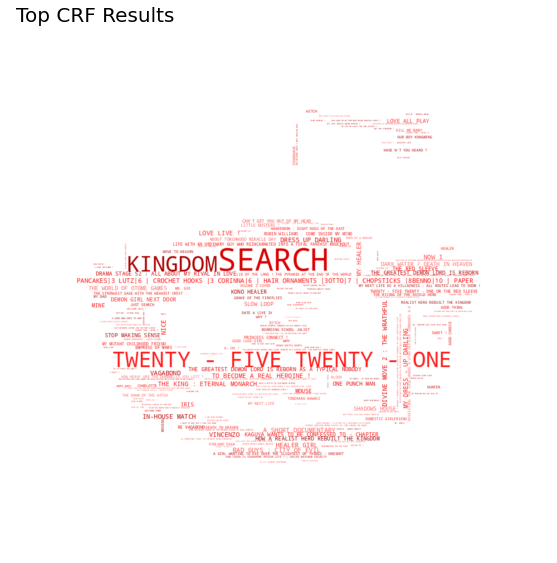

In [ ]:

crfnt.make_wordcloud(df_final)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90b052a7-f47d-474e-888f-9345355cfd9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>